In [6]:
%pip install psycopg2-binary

   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 38.8 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
password = "236125"

In [48]:
import psycopg2 as pg2

conn = pg2.connect(host="localhost", port=5432, dbname="postgres", user="postgres", password=password)
cur = conn.cursor()

In [14]:
query = """
UPDATE users SET name = 'User 77', email = 'user77_@example.com', signup_date = CURRENT_TIMESTAMP WHERE id = 77;
"""

try:
    cur.execute(query)
    conn.commit()

except Exception as e:
    conn.rollback()
    print("An error occurred:", e)

cur.close()
conn.close()

In [47]:
cur.close()
conn.close()

In [ ]:
import pandas as pd 

chick_info = pd.read_sql('SELECT * FROM "FMS".chick_info;', conn)
health_cond = pd.read_sql('SELECT * FROM "FMS".health_cond;', conn)
prod_result = pd.read_sql('SELECT * FROM "FMS".prod_result;', conn)
ship_result = pd.read_sql('SELECT * FROM "FMS".ship_result;', conn)
unit = pd.read_sql('SELECT * FROM "FMS".unit;', conn)
master_code = pd.read_sql('SELECT * FROM "FMS".master_code;', conn)

In [ ]:
query = """SELECT m.code_desc, p.raw_weight
FROM "FMS".master_code m, "FMS".prod_result p, "FMS".chick_info c
WHERE m.code = c.breeds AND c.chick_no = p.chick_no;"""

weight_data = pd.read_sql(query, conn)
weight_data.head()

[Text(0.5, 0, '품종'), Text(0, 0.5, '중량(g)'), Text(0.5, 1.0, '품종별 무게 분포_김혜은')]

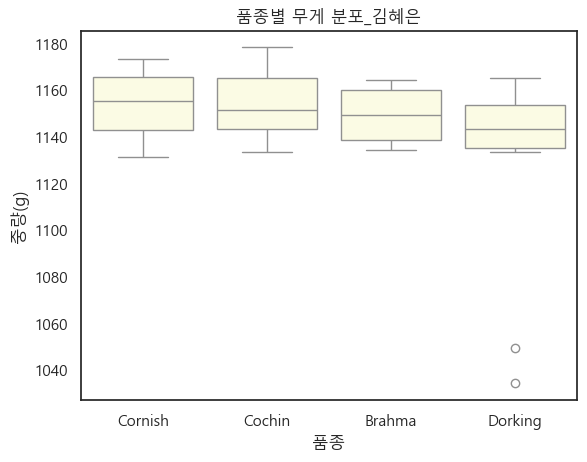

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn Korean Font Setting
plt.rc("font", family="Malgun Gothic")
sns.set_theme(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style="white")

# Plotting
sns.boxplot(data=weight_data, x='code_desc', y='raw_weight', color='lightyellow').set(xlabel='품종', ylabel='중량(g)', title='품종별 무게 분포_김혜은')

In [63]:
from flask import Flask
app= Flask(__name__)

@app.route('/')
def hello():
    return "Hello, World!"

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [30/Jan/2026 11:19:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Jan/2026 11:19:49] "GET /favicon.ico HTTP/1.1" 404 -
